In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np # Es buena práctica importar numpy

In [ ]:
# Cargar imagen oscura
img_bgr = cv2.imread('/content/RM columna vert.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convertir a HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Separar canales H, S y V
h, s, v = cv2.split(img_hsv)

# Ecualizar solo el canal de valor (brillo)
v_eq = cv2.equalizeHist(v)

# Combinar canales con el V ecualizado
img_hsv_eq = cv2.merge([h, s, v_eq])

# Convertir de nuevo a BGR y luego a RGB para visualización
img_eq_bgr = cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2BGR)
img_eq_rgb = cv2.cvtColor(img_eq_bgr, cv2.COLOR_BGR2RGB)



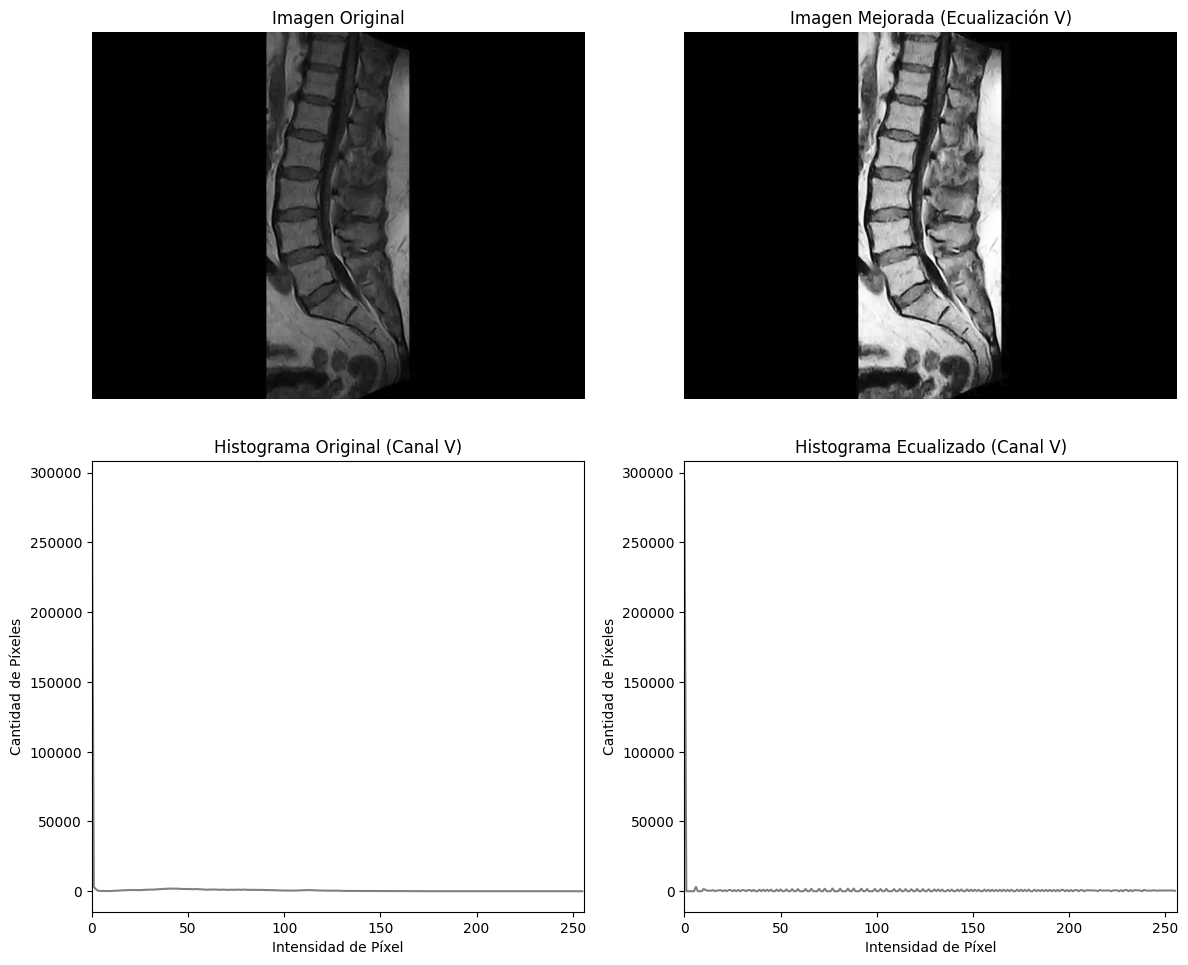

In [ ]:
# Calcular el histograma para el canal V (valor) de la imagen original
hist_original = cv2.calcHist([v], [0], None, [256], [0, 256])

# Calcular el histograma para el canal V ecualizado
hist_equalizado = cv2.calcHist([v_eq], [0], None, [256], [0, 256])

# Configurar la visualización en una cuadrícula de 2x2
plt.figure(figsize=(12, 10))

# 1. Imagen Original
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

# 2. Imagen Mejorada
plt.subplot(2, 2, 2)
plt.imshow(img_eq_rgb)
plt.title('Imagen Mejorada (Ecualización V)')
plt.axis('off')

# 3. Histograma Original
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='gray')
plt.title('Histograma Original (Canal V)')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Cantidad de Píxeles')
plt.xlim([0, 256])

# 4. Histograma Ecualizado
plt.subplot(2, 2, 4)
plt.plot(hist_equalizado, color='gray')
plt.title('Histograma Ecualizado (Canal V)')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Cantidad de Píxeles')
plt.xlim([0, 256])

plt.tight_layout() # Ajusta automáticamente los subplots para que no se superpongan
plt.show()